<a href="https://colab.research.google.com/github/Darktechie-programmer/ML_Projects/blob/master/Cancer_Detection_using_transfer_learning/Cancer_Detection_using_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## install the dependencies
!pip install kaggle

In [2]:
## upload the link and key for the kaggle connection
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"techieamit","key":"c058ab252b1af78b12454730ec14665f"}'}

In [3]:
## add the folder 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

## change the permission 
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# add the my username in kaggle
!kaggle kernels list — user techieamit  — sort-by dateRun

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: — user techieamit — sort-by dateRun


In [5]:
### download or can say link the dataset to colab 
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.27G/2.29G [00:50<00:00, 61.5MB/s]
100% 2.29G/2.29G [00:50<00:00, 48.9MB/s]


In [6]:
## unzip the dataset
!unzip -q chest-xray-pneumonia.zip -d .

In [7]:
# Import the libraries....
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


In [8]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [9]:
## check the how many folder in the dataset
!ls chest_xray/

chest_xray  __MACOSX  test  train  val


In [10]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'chest_xray/train/'
valid_path = 'chest_xray/test/'

In [11]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 3s 0us/step


In [13]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [14]:
# useful for getting number of output classes
folders = glob('chest_xray/train/*')

In [15]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [17]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [18]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [21]:
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 136s 837ms/step - loss: 0.2164 - accuracy: 0.9166 - val_loss: 1.4771 - val_accuracy: 0.8173
Epoch 2/5
163/163 [==============================] - 128s 787ms/step - loss: 0.1121 - accuracy: 0.9586 - val_loss: 0.1205 - val_accuracy: 0.9071
Epoch 3/5
163/163 [==============================] - 129s 793ms/step - loss: 0.1051 - accuracy: 0.9617 - val_loss: 0.4985 - val_accuracy: 0.9054
Epoch 4/5
163/163 [==============================] - 129s 794ms/step - loss: 0.0725 - accuracy: 0.9711 - val_loss: 0.0682 - val_accuracy: 0.8894
Epoch 5/5
163/163 [==============================] - 130s 801ms/step - loss: 0.0766 - accuracy: 0.9707 - val_loss: 0.2141 - val_accuracy: 0.8846


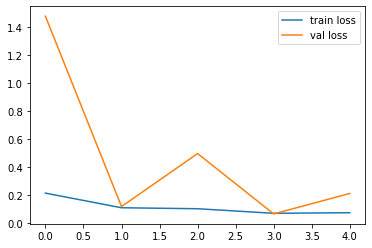

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

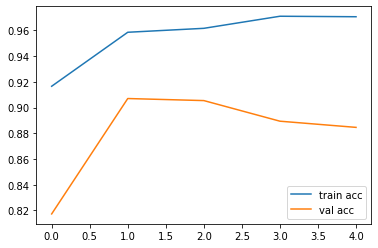

In [24]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [25]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model
## save the model 
model.save('model_vgg16.h5')

In [26]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3

# Use after next..

In [27]:
## these libraries use for load and check the model
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_check = load_model('model_vgg16.h5')

In [28]:
## test 1: 
## load the image and check the prediction
img = image.load_img('chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg',target_size=(224,224))
ans = image.img_to_array(img)
ans = np.expand_dims(ans, axis=0)
img_data = preprocess_input(ans)
classes = model.predict(img_data)

In [29]:
## classes give the ans... first value for NORMAL second for Cancer
classes

array([[0., 1.]], dtype=float32)

In [30]:
## check the prediction
if classes[0][0] <= 0.5:
  print("Oops! You have cancer.")
else:
  print("Great! You don't have cancer.")

Oops! You have cancer.


In [31]:
## test 2: 
img = image.load_img('chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg',target_size=(224,224))
ans = image.img_to_array(img)
ans = np.expand_dims(ans, axis=0)
img_data = preprocess_input(ans)
classes = model.predict(img_data)
if classes[0][0] <= 0.5:
  print("Oops! You have cancer.")
else:
  print("Great! You don't have cancer.")

Great! You don't have cancer.


In [35]:
#### for VGG19 ######
from keras.applications.vgg19 import VGG19

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'chest_xray/train/'
valid_path = 'chest_xray/test/'
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

# useful for getting number of output classes
folders = glob('chest_xray/train/*')

# our layers - you can add more if you want
x = Flatten()(vgg19.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 140s 859ms/step - loss: 0.2477 - accuracy: 0.9028 - val_loss: 0.1843 - val_accuracy: 0.8862
Epoch 2/5
163/163 [==============================] - 137s 841ms/step - loss: 0.1416 - accuracy: 0.9475 - val_loss: 0.2757 - val_accuracy: 0.8894
Epoch 3/5
163/163 [==============================] - 138s 847ms/step - loss: 0.1188 - accuracy: 0.9561 - val_loss: 0.3269 - val_accuracy: 0.9167
Epoch 4/5
163/163 [==============================] - 137s 843ms/step - loss: 0.1149 - accuracy: 0.9580 - val_loss: 0.4478 - val_accuracy: 0.8958
Epoch 5/5
163/163 [==============================] - 136s 837ms/step - loss: 0.0976 - accuracy: 0.9605 - val_loss: 0.5367 - val_accuracy: 0.8317


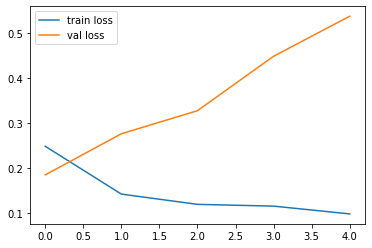

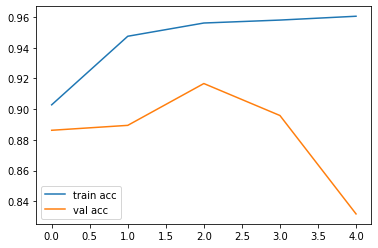

Oops! You have cancer.


In [36]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


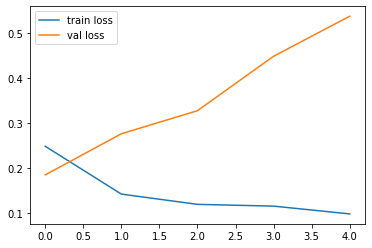

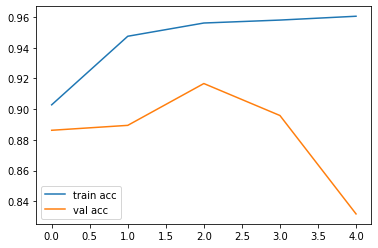

Oops! You have cancer.


In [37]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

# save it as a h5 file
## save the model 
model.save('model_vgg19.h5')

## these libraries use for load and check the model
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input         
model_check = load_model('model_vgg19.h5')

## test 2: 
img = image.load_img('chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg',target_size=(224,224))
ans = image.img_to_array(img)
ans = np.expand_dims(ans, axis=0)
img_data = preprocess_input(ans)
classes = model.predict(img_data)
if classes[0][0] <= 0.5:
  print("Oops! You have cancer.")
else:
  print("Great! You don't have cancer.")

In [38]:
#### for InceptionV3 ######
from keras.applications.inception_v3 import InceptionV3

incepv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


# don't train existing weights
for layer in incepv3.layers:
    layer.trainable = False

# useful for getting number of output classes
folders = glob('chest_xray/train/*')

# our layers - you can add more if you want
x = Flatten()(incepv3.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=incepv3.input, outputs=prediction)

# view the structure of the model
model.summary()


87916544/87910968 [==============================] - 4s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
___________________________

In [39]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 137s 840ms/step - loss: 0.7680 - accuracy: 0.8752 - val_loss: 7.8662 - val_accuracy: 0.6330
Epoch 2/5
163/163 [==============================] - 125s 764ms/step - loss: 0.5950 - accuracy: 0.9003 - val_loss: 8.2984 - val_accuracy: 0.6266
Epoch 3/5
163/163 [==============================] - 128s 783ms/step - loss: 0.7042 - accuracy: 0.9087 - val_loss: 3.2582 - val_accuracy: 0.6234
Epoch 4/5
163/163 [==============================] - 128s 787ms/step - loss: 0.5254 - accuracy: 0.9296 - val_loss: 6.2532 - val_accuracy: 0.6538
Epoch 5/5
163/163 [==============================] - 127s 779ms/step - loss: 0.6702 - accuracy: 0.9176 - val_loss: 9.2853 - val_accuracy: 0.6699


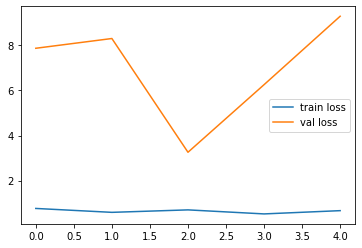

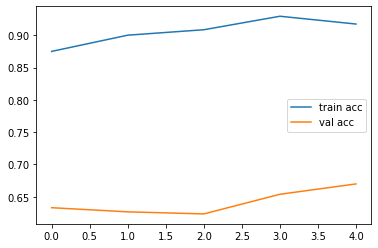

Oops! You have cancer.


In [42]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

# save it as a h5 file
## save the model 
model.save('model_incepv3.h5')

## these libraries use for load and check the model
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input        
model_check = load_model('model_incepv3.h5')

## test 2: 
img = image.load_img('chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg',target_size=(224,224))
ans = image.img_to_array(img)
ans = np.expand_dims(ans, axis=0)
img_data = preprocess_input(ans)
classes = model.predict(img_data)
if classes[0][0] <= 0.5:
  print("Oops! You have cancer.")
else:
  print("Great! You don't have cancer.")

In [43]:
#### for ResNet50 ######
from keras.applications.resnet50 import ResNet50


# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'chest_xray/train/'
valid_path = 'chest_xray/test/'
rs50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


# don't train existing weights
for layer in rs50.layers:
    layer.trainable = False

# useful for getting number of output classes
folders = glob('chest_xray/train/*')

# our layers - you can add more if you want
x = Flatten()(rs50.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=rs50.input, outputs=prediction)

# view the structure of the model
model.summary()


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________

In [44]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 142s 873ms/step - loss: 1.0963 - accuracy: 0.9417 - val_loss: 5.4683 - val_accuracy: 0.6250
Epoch 2/5
163/163 [==============================] - 132s 808ms/step - loss: 1.0009 - accuracy: 0.9595 - val_loss: 9.2897 - val_accuracy: 0.6250
Epoch 3/5
163/163 [==============================] - 133s 817ms/step - loss: 0.8589 - accuracy: 0.9670 - val_loss: 5.3565 - val_accuracy: 0.6250
Epoch 4/5
163/163 [==============================] - 133s 816ms/step - loss: 0.7089 - accuracy: 0.9737 - val_loss: 13.3990 - val_accuracy: 0.6250
Epoch 5/5
163/163 [==============================] - 134s 822ms/step - loss: 0.9605 - accuracy: 0.9686 - val_loss: 2.1813 - val_accuracy: 0.6250


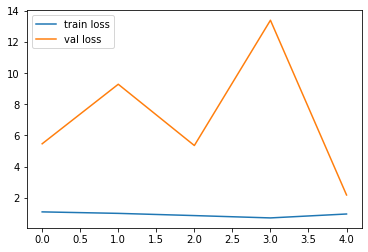

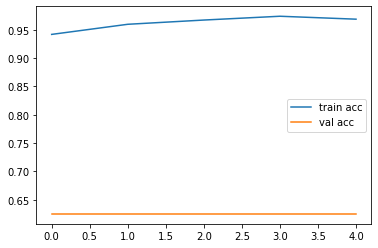

Great! You don't have cancer.


In [45]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

# save it as a h5 file
## save the model 
model.save('model_rs50.h5')

## these libraries use for load and check the model
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input        
model_check = load_model('model_rs50.h5')

## test 2: 
img = image.load_img('chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg',target_size=(224,224))
ans = image.img_to_array(img)
ans = np.expand_dims(ans, axis=0)
img_data = preprocess_input(ans)
classes = model.predict(img_data)
if classes[0][0] <= 0.5:
  print("Oops! You have cancer.")
else:
  print("Great! You don't have cancer.")